# 股市财报数据可视化产品开发

In [1]:
import sqlite3
import pandas as pd  
import talib
from datetime import datetime
import backtrader as bt
import matplotlib.pyplot as plt
import akshare as ak
import numpy as np
%matplotlib inline   

#正常显示画图时出现的中文和负号
from pylab import mpl

mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

## 财务数据构成

财务三张表指的是资产负债表、利润表以及现金流量表，具体概念分别如下：


　　1、资产负债表，资产负债表亦称财务状况表，表示企业在一定日期（通常为各会计期末）的财务状况（即资产、负债和所有者权益的状况）的主要会计报表。

　　2、利润表，利润表是反映企业在一定会计期间经营成果的报表。由于它反映的是某一期间的情况，所以又被称为动态报表。利润表也被称为损益表、收益表。

　　3、现金流量表，是反映在一固定期间（通常是每月或每季）内，企业的现金（包含银行存款）的增减变动情形。

1、资产负债表（balance sheet）：是总括地反映会计主体在特定日期（如年末、季末、月末）财务况的报表。

2、损益表（income statement）：也称收益表、损益表，它是总括反映企业在某一会计期间（如年度、季度、月份）内经营及其分配（或弥补）情况的一种会计报表。

3、现金流量表（statement of cash flow）：反映企业现金流量的来龙去脉，当中分为经营活动、投资活动及筹资活动三部份。



## akshare中提供的财务数据

* akshare 中提供的财务数据更多样，并且能实时，但是很多函数总是存在变动，官网文档有时更新不及时，建议多用help了解变化，通过百度也常常能定位到作者知乎上的最新文档

https://www.zhihu.com/people/bjck

* akshare的财务数据

### “akshare股票数据”——“基本面数据”——“财务报表”（这里主要提供某个股票所有历史财务数据）

In [24]:
help(ak.stock_financial_report_sina)

Help on function stock_financial_report_sina in module akshare.stock_fundamental.stock_finance:

stock_financial_report_sina(stock: str = '600004', symbol: str = '现金流量表') -> pandas.core.frame.DataFrame
    新浪财经-财务报表-三大报表
    https://vip.stock.finance.sina.com.cn/corp/go.php/vFD_BalanceSheet/stockid/600004/ctrl/part/displaytype/4.phtml
    :param stock: 股票代码
    :type stock: str
    :param symbol: choice of {"资产负债表", "利润表", "现金流量表"}
    :type symbol:
    :return: 新浪财经-财务报表-三大报表
    :rtype: pandas.DataFrame



In [6]:
byd_zcfz = ak.stock_financial_report_sina(stock="002594", symbol="资产负债表")
byd_lrb = ak.stock_financial_report_sina(stock="002594", symbol="利润表")
byd_xjllb=ak.stock_financial_report_sina(stock="002594", symbol="现金流量表")
byd_cwzb = ak.stock_financial_analysis_indicator(symbol="002594")#主要财务指标

In [8]:
#byd_xjllb

In [10]:
#byd_zcfz.columns

In [42]:
#byd_lrb.columns

In [12]:
#byd_xjllb.columns

In [44]:
#byd_cwzb.columns

### “akshare股票数据”——“季报年报”（主要提供是每天所有股票的相关财务数据，比较方便做横截面分析与因子策略）

In [3]:
stock_zcfz_em_df = ak.stock_zcfz_em(date="20220331")
stock_lrb_em_df = ak.stock_lrb_em(date="20220331")
stock_xjll_em_df = ak.stock_xjll_em(date="20220331")

In [5]:
#stock_zcfz_em_df

In [3]:
stock_zcfz_em_df.columns

Index(['序号', '股票代码', '股票简称', '资产-货币资金', '资产-应收账款', '资产-存货', '资产-总资产',
       '资产-总资产同比', '负债-应付账款', '负债-预收账款', '负债-总负债', '负债-总负债同比', '资产负债率',
       '股东权益合计', '公告日期'],
      dtype='object')

In [6]:
stock_xjll_em_df.columns

Index(['序号', '股票代码', '股票简称', '净现金流-净现金流', '净现金流-同比增长', '经营性现金流-现金流量净额',
       '经营性现金流-净现金流占比', '投资性现金流-现金流量净额', '投资性现金流-净现金流占比', '融资性现金流-现金流量净额',
       '融资性现金流-净现金流占比', '公告日期'],
      dtype='object')

In [8]:
stock_xjll_em_df.columns

Index(['序号', '股票代码', '股票简称', '净现金流-净现金流', '净现金流-同比增长', '经营性现金流-现金流量净额',
       '经营性现金流-净现金流占比', '投资性现金流-现金流量净额', '投资性现金流-净现金流占比', '融资性现金流-现金流量净额',
       '融资性现金流-净现金流占比', '公告日期'],
      dtype='object')

## 课程sql数据介绍

包含了一下五张表
[('xjllb',现金流表), ('zcfzb',资产负债表), ('lrb',利润表), ('cwzbsj',主要财务指标), ('stock_daily',股票价格)]

其中stock_daily包含了上证2千多只股票2018年1月——2023年2月的所有日线数据

此数据是淘宝花了几十块钱买的，为了减少体积减少了年份与股票数

其实也可以通过akshare爬取，如果需要更新数据建议自行爬取并写入数据库

### sqlite3的基本操作

* 数据库的连接 ：sqlite3.connect(r'F:\量化金融\stock_2018.db')

* 数据库命令的执行：c.execute("select name from sqlite_master where type='table'")

* pandas下的数据库操作：读pd.read_sql；写z1.to_sql('stock_daily',conn,if_exists="append")

In [2]:
conn=sqlite3.connect(r'F:\量化金融\stock_2018.db')

In [14]:
xjllb=pd.read_sql("select * from xjllb",con=conn)
lrb=pd.read_sql("select * from lrb",con=conn)
zcfzb=pd.read_sql("select * from zcfzb",con=conn)
cwzbsj=pd.read_sql("select * from cwzbsj",con=conn)
stock_daily=pd.read_sql("select * from stock_daily where 股票代码<'003000.SZ'",con=conn)

In [3]:
stock_daily=pd.read_sql("select * from stock_daily where 股票代码>'003000.SZ'",con=conn)
cwzbsj=pd.read_sql("select * from cwzbsj",con=conn)

In [8]:
stock_daily.columns

Index(['index', '交易日期', '股票代码', '股票简称', '开盘价', '最高价', '最低价', '收盘价', '成交量(手)',
       '成交额(千元)', '换手率(%)', '量比', '市盈率(静态)', '市盈率(TTM)', '市盈率(动态)', '市净率',
       '市销率', '市销率(TTM)', '股息率(%)', '股息率(TTM)(%)', '总股本(万股)', '流通股本(万股)',
       '总市值(万元)', '流通市值(万元)'],
      dtype='object')

In [11]:
z1=stock_daily[stock_daily['股票简称'].isin(["格力电器","比亚迪"])].pivot(index="交易日期",columns="股票简称",values="收盘价").fillna(0)

In [2]:
#stock_daily['股票简称']

In [22]:
#print(lrb.columns.tolist())

In [ ]:
cwzbsj

In [ ]:
stock_daily["date"]=stock_daily["date"].astype("str").astype("datetime64")

In [12]:
cwzbsj[['股票代码', '公告日期', '报告期']].last("1m")

TypeError: 'last' only supports a DatetimeIndex index

In [4]:
cwzbsj["报告期"].astype("str").astype("datetime64")

0       2018-03-31
1       2018-06-30
2       2018-09-30
3       2018-12-31
4       2019-03-31
           ...    
89165   2021-09-30
89166   2021-12-31
89167   2022-03-31
89168   2022-06-30
89169   2022-09-30
Name: 报告期, Length: 89170, dtype: datetime64[ns]

In [ ]:
'扣除非经常性损益后的净利润(扣非净利润)','净资产收益率(扣除非经常损益)','销售毛利率','销售净利率', '企业自由现金流量', '非经常性损益','净债务','每股净资产'

In [ ]:
安全性指标 流动比率,速动比率,资产负债率,净资产负债率,利息保障倍数,还债能力
盈利能力指标 营业利润率,销售毛利率,销售净利率,总资产收益率,净资产收益率
杜邦分析 扣非净利润率,总资产周转率,财务杠杆率
成长性指标分析 营业收入及增长率 净利润及增长率
管理水平指标分析 应收账款周转率 存货周转率 固定资产周转率
估值指标分析 分红比率 企业价值倍数 PEG=市盈率/净利润增长率 市现率=股价/每股现金流量净额

In [24]:
print(list(cwzbsj.columns))

['index', '股票代码', '公告日期', '报告期', '基本每股收益', '稀释每股收益', '每股营业总收入', '每股营业收入', '每股资本公积', '每股盈余公积', '每股未分配利润', '非经常性损益', '扣除非经常性损益后的净利润(扣非净利润)', '毛利', '流动比率', '速动比率', '保守速动比率', '存货周转天数', '应收账款周转天数', '存货周转率', '应收账款周转率', '流动资产周转率', '固定资产周转率', '总资产周转率', '经营活动净收益', '价值变动净收益', '利息费用', '折旧与摊销', '息税前利润', '息税折旧摊销前利润', '企业自由现金流量', '股权自由现金流量', '无息流动负债', '无息非流动负债', '带息债务', '净债务', '有形资产', '营运资金', '营运流动资本', '全部投入资本', '留存收益', '期末摊薄每股收益', '每股净资产', '每股经营活动产生的现金流量净额', '每股留存收益', '每股现金流量净额', '每股息税前利润', '每股企业自由现金流量', '每股股东自由现金流量', '销售净利率', '销售毛利率', '销售成本率', '销售期间费用率', '净利润/营业总收入', '销售费用/营业总收入', '管理费用/营业总收入', '财务费用/营业总收入', '资产减值损失/营业总收入', '营业总成本/营业总收入', '营业利润/营业总收入', '息税前利润/营业总收入', '净资产收益率', '加权平均净资产收益率', '净资产收益率(扣除非经常损益)', '总资产报酬率', '总资产净利润', '投入资本回报率', '年化净资产收益率', '年化总资产报酬率', '平均净资产收益率(增发条件)', '经营活动净收益/利润总额', '价值变动净收益/利润总额', '营业外收支净额/利润总额', '所得税/利润总额', '扣除非经常损益后的净利润/净利润', '销售商品提供劳务收到的现金/营业收入', '经营活动产生的现金流量净额/营业收入', '经营活动产生的现金流量净额/经营活动净收益', '资本支出/折旧和摊销', '资产负债率', '权益乘数', '权益乘数(杜邦分析)', '流动资产/总资产', '非流动资产/总资产', '

# 股票数据产品主要功能开发

* 传统的财报数据分析文档

* 分析思路

1. 单股分析，多股对比分析

2. 财务数据分析与行情数据分析

3. 股票估值分析

4. 财务指标的维度：安全性，盈利能力，成长行，管理能力

5. 风险风险

* streamlit

## 单股分析


### 完成单个股票关键财务字段的展示

* @st.cache_data streamlit装饰器的作用



In [13]:
cwzbsj

,index,股票代码,公告日期,基本每股收益,稀释每股收益,每股营业总收入,每股营业收入,每股资本公积,每股盈余公积,每股未分配利润,...,营业收入环比增长率(%)(单季度),营业利润同比增长率(%)(单季度),营业利润环比增长率(%)(单季度),净利润同比增长率(%)(单季度),净利润环比增长率(%)(单季度),归属母公司股东的净利润同比增长率(%)(单季度),归属母公司股东的净利润环比增长率(%)(单季度),净资产同比增长率,研发费用,更新标识
报告期,,,,,,,,,,,,,,,,,,,,,
20180331,85,000001.SZ,20180420,0.33,0.33,1.6323,1.6323,3.2886,0.6279,4.6852,...,7.9875,4.1495,64.3500,6.1313,63.4044,6.1313,63.4044,7.5345,None,1
20180630,86,000001.SZ,20180816,0.73,0.73,3.3338,3.3338,3.2886,0.6279,4.9440,...,4.2425,7.2488,2.7260,6.8927,2.7597,6.8927,2.7597,7.8916,None,1
20180930,87,000001.SZ,20181024,1.14,1.14,5.0474,5.0474,3.2886,0.6279,5.3566,...,0.7120,7.9320,4.4681,7.3496,4.5300,7.3496,4.5300,7.8492,None,1
20181231,88,000001.SZ,20190307,1.39,1.39,6.7977,6.7977,3.2886,0.6279,5.5351,...,2.1378,8.9395,-38.2219,8.0773,-38.4246,8.0773,-38.4246,8.1007,None,1
20190331,89,000001.SZ,20190424,0.38,0.36,1.8914,1.8914,3.2886,0.6279,5.9178,...,8.0660,12.6165,69.8647,12.9037,70.7015,12.9037,70.7015,12.3313,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20210930,1,873527.BJ,20221028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.4368,NaN,20.8129,NaN,18.3438,NaN,18.3438,NaN,None,0
20211231,2,873527.BJ,20220929,0.71,0.71,8.6172,8.6172,1.3959,0.3103,1.9818,...,16.8780,NaN,90.8780,NaN,86.4179,NaN,86.4179,12.5044,13731119.82,1
20220331,3,873527.BJ,20220609,0.09,0.09,1.6523,1.6523,1.3959,0.3103,2.0720,...,-39.2054,21.8618,-72.9238,22.7886,-71.6256,22.7886,-71.6256,NaN,2749094.0,1


In [34]:
cwzbsj[cwzbsj["股票代码"]=="000651.SZ"][['扣除非经常性损益后的净利润(扣非净利润)','净资产收益率(扣除非经常损益)','销售毛利率','销售净利率', '企业自由现金流量', '非经常性损益','净债务','每股净资产']]

,扣除非经常性损益后的净利润(扣非净利润),净资产收益率(扣除非经常损益),销售毛利率,销售净利率,企业自由现金流量,非经常性损益,净债务,每股净资产
报告期,,,,,,,,
2018-03-31,4186013203.83,6.1326,30.8578,14.1718,6.714461e+09,1395611192.8,-83447897105.82,11.7892
2018-06-30,12632290055.79,17.5548,30.0265,14.1634,5.249164e+09,173910407.56,-81474385853.23,13.0198
2018-09-30,21345703240.01,28.0347,30.1534,14.2846,1.677785e+09,-227267487.99,-78138676694.04,14.4098
2018-12-31,25580865501.38,32.6033,30.2282,13.3145,1.660761e+10,621922180.04,-90695400586.28,15.1814
2019-03-31,5113678278.15,5.5338,30.5896,14.0518,6.083189e+09,558190762.94,-92446387419.83,15.5409
2019-06-30,13393426690.0,14.5764,31.0230,14.1995,2.536284e+10,356767398.89,-100059497602.02,15.3667
2019-09-30,21565496233.75,22.4501,30.1627,14.3304,3.571139e+10,552000133.27,-112832228293.35,16.7548
2019-12-31,24171511911.32,23.9939,27.5815,12.5293,3.879401e+10,525129457.52,-105982193943.38,18.3109
2020-03-31,1429583505.27,1.2816,17.4892,7.7363,-7.132382e+09,128430033.74,-98881396650.03,18.7747


In [15]:
cwzbsj["报告期"]=cwzbsj["报告期"].astype("str").astype("datetime64")
cwzbsj.set_index("报告期",inplace=True)

In [16]:
cwzbsj["企业自由现金流量"]

报告期
2018-03-31             NaN
2018-06-30    3.165969e+10
2018-09-30             NaN
2018-12-31    1.329879e+11
2019-03-31             NaN
                  ...     
2021-09-30             NaN
2021-12-31    4.148790e+07
2022-03-31   -5.409728e+07
2022-06-30   -3.822863e+07
2022-09-30   -8.789537e+07
Name: 企业自由现金流量, Length: 89170, dtype: float64

In [19]:
stock_daily=pd.read_sql("select * from stock_daily where 股票代码<'003000.SZ'",con=conn)

In [17]:
stock_daily["交易日期"]=stock_daily["交易日期"].astype("str").astype("datetime64")
stock_daily.set_index("交易日期",inplace=True)

In [11]:
cwzbsj["报告期"]=cwzbsj["报告期"].astype("str").astype("datetime64")
cwzbsj.set_index("报告期",inplace=True)

In [18]:
stock_cw=cwzbsj[cwzbsj["股票代码"]=="000651.SZ"][['扣除非经常性损益后的净利润(扣非净利润)','净资产收益率(扣除非经常损益)','销售毛利率','销售净利率','企业自由现金流量']]
stock_price_gl=stock_daily[stock_daily["股票代码"]=="000651.SZ"][['收盘价', '成交量(手)','量比', '市盈率(静态)', '市盈率(TTM)', '市盈率(动态)', '市净率','市销率', '市销率(TTM)', '股息率(%)', '股息率(TTM)(%)','总市值(万元)', '流通市值(万元)']]

* 相关streamlit代码

In [ ]:
stock_id = st.sidebar.text_input('stock_id', '000651.SZ')

choice1 = st.sidebar.selectbox('选择一个字段', menu1)

st.sidebar.multiselect

### 完成单股财务数据与行情数据的可视化展示

* echarts 的时间数据转换方法：[d.strftime("%Y-%m-%d")for d in data_cw.index.tolist()]

In [36]:
#[d.strftime("%Y-%m-%d")for d in cwzbsj.index.tolist()]

### 完成财务数据与行情数据的对比可视化展示

* 重采样与bfill()
* pd.concat

In [32]:
stock_price_gl

,收盘价,成交量(手),量比,市盈率(静态),市盈率(TTM),市盈率(动态),市净率,市销率,市销率(TTM),股息率(%),股息率(TTM)(%),总市值(万元),流通市值(万元)
交易日期,,,,,,,,,,,,,
2018-01-02,6750.5571,587146.42,1.33,17.6131,13.8206,13.18,4.6331,2.5079,1.9862,3.9867,3.9867,2.716102e+07,2.695677e+07
2018-01-03,6825.3141,794304.89,1.73,17.8081,13.9736,13.32,4.6844,2.5357,2.0082,3.9430,3.9430,2.746181e+07,2.725530e+07
2018-01-04,6964.3621,640485.24,1.18,18.1709,14.2583,13.59,4.7798,2.5873,2.0491,3.8643,3.8643,2.802127e+07,2.781055e+07
2018-01-05,7158.7303,781865.80,1.39,18.6780,14.6562,13.97,4.9132,2.6595,2.1063,3.7594,3.7594,2.880332e+07,2.858672e+07
2018-01-08,7151.2546,788630.47,1.24,18.6585,14.6409,13.96,4.9081,2.6567,2.1041,3.7633,3.7633,2.877324e+07,2.855686e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-13,6539.2425,286385.56,1.27,8.4750,7.5989,8.01,2.0422,1.0404,0.9911,8.4977,8.4977,1.954661e+07,1.939418e+07
2023-02-14,6569.3860,192681.97,0.90,8.5141,7.6339,8.05,2.0516,1.0452,0.9957,8.4587,8.4587,1.963671e+07,1.948358e+07
2023-02-15,6507.2151,167134.17,0.80,8.4335,7.5616,7.97,2.0322,1.0353,0.9862,8.5395,8.5395,1.945088e+07,1.929919e+07


In [31]:
stock_cw1

,扣除非经常性损益后的净利润(扣非净利润),净资产收益率(扣除非经常损益),销售毛利率,销售净利率,企业自由现金流量
报告期,,,,,
2018-03-31,4186013203.83,6.1326,30.8578,14.1718,6.714461e+09
2018-04-01,12632290055.79,17.5548,30.0265,14.1634,5.249164e+09
2018-04-02,12632290055.79,17.5548,30.0265,14.1634,5.249164e+09
2018-04-03,12632290055.79,17.5548,30.0265,14.1634,5.249164e+09
2018-04-04,12632290055.79,17.5548,30.0265,14.1634,5.249164e+09
...,...,...,...,...,...
2022-09-26,18566867450.84,18.6260,25.5401,11.8268,1.008118e+10
2022-09-27,18566867450.84,18.6260,25.5401,11.8268,1.008118e+10
2022-09-28,18566867450.84,18.6260,25.5401,11.8268,1.008118e+10


In [30]:
pd.concat([stock_price_gl,stock_cw1],axis=1).dropna()

,收盘价,成交量(手),量比,市盈率(静态),市盈率(TTM),市盈率(动态),市净率,市销率,市销率(TTM),股息率(%),股息率(TTM)(%),总市值(万元),流通市值(万元),扣除非经常性损益后的净利润(扣非净利润),净资产收益率(扣除非经常损益),销售毛利率,销售净利率,企业自由现金流量
2018-04-02,6873.1586,508996.09,0.74,17.9329,14.0716,13.42,4.7172,2.5534,2.0223,3.9156,3.9156,2.765431e+07,2.744635e+07,12632290055.79,17.5548,30.0265,14.1634,5.249164e+09
2018-04-03,6895.5857,372046.90,0.55,17.9914,14.1175,13.46,4.7326,2.5618,2.0289,3.9029,3.9029,2.774455e+07,2.753591e+07,12632290055.79,17.5548,30.0265,14.1634,5.249164e+09
2018-04-04,6997.2552,491215.51,0.78,18.2567,14.3256,13.66,4.8024,2.5995,2.0588,3.8462,3.8462,2.815362e+07,2.794190e+07,12632290055.79,17.5548,30.0265,14.1634,5.249164e+09
2018-04-09,6835.7801,505261.63,0.93,17.8354,13.9950,13.34,4.6916,2.5395,2.0113,3.9370,3.9370,2.750392e+07,2.729709e+07,12632290055.79,17.5548,30.0265,14.1634,5.249164e+09
2018-04-10,7128.8275,582346.74,1.22,18.6000,14.5950,13.91,4.8927,2.6484,2.0975,3.7752,3.7752,2.868300e+07,2.846731e+07,12632290055.79,17.5548,30.0265,14.1634,5.249164e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,6190.7090,298663.72,0.73,8.0233,7.3803,8.07,2.4896,0.9850,0.9636,9.0531,8.9761,1.850480e+07,1.836049e+07,18566867450.84,18.6260,25.5401,11.8268,1.008118e+10
2022-09-27,6301.8629,383659.70,1.00,8.1674,7.5128,8.21,2.5343,1.0027,0.9809,8.8934,8.8177,1.883705e+07,1.869015e+07,18566867450.84,18.6260,25.5401,11.8268,1.008118e+10
2022-09-28,6217.0845,257902.22,0.69,8.0575,7.4117,8.10,2.5002,0.9892,0.9677,9.0147,8.9380,1.858364e+07,1.843872e+07,18566867450.84,18.6260,25.5401,11.8268,1.008118e+10
2022-09-29,6132.3061,276083.38,0.77,7.9476,7.3106,7.99,2.4661,0.9757,0.9545,9.1393,9.0616,1.833023e+07,1.818728e+07,18566867450.84,18.6260,25.5401,11.8268,1.008118e+10


In [57]:
stock_cw1=stock_cw.resample("d").bfill()

In [27]:
pd.concat([stock_price_gl.iloc[58:62],stock_cw1.iloc[0:3]],axis=1)

,收盘价,成交量(手),量比,市盈率(静态),市盈率(TTM),市盈率(动态),市净率,市销率,市销率(TTM),股息率(%),股息率(TTM)(%),总市值(万元),流通市值(万元),扣除非经常性损益后的净利润(扣非净利润),净资产收益率(扣除非经常损益),销售毛利率,销售净利率,企业自由现金流量
2018-03-30,7012.2066,506755.48,0.66,18.2957,14.3562,13.69,4.8127,2.6051,2.0632,3.8380,3.8380,2.821378e+07,2.800161e+07,NaN,NaN,NaN,NaN,NaN
2018-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4186013203.83,6.1326,30.8578,14.1718,6.714461e+09
2018-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12632290055.79,17.5548,30.0265,14.1634,5.249164e+09
2018-04-02,6873.1586,508996.09,0.74,17.9329,14.0716,13.42,4.7172,2.5534,2.0223,3.9156,3.9156,2.765431e+07,2.744635e+07,12632290055.79,17.5548,30.0265,14.1634,5.249164e+09
2018-04-03,6895.5857,372046.90,0.55,17.9914,14.1175,13.46,4.7326,2.5618,2.0289,3.9029,3.9029,2.774455e+07,2.753591e+07,NaN,NaN,NaN,NaN,NaN
2018-04-04,6997.2552,491215.51,0.78,18.2567,14.3256,13.66,4.8024,2.5995,2.0588,3.8462,3.8462,2.815362e+07,2.794190e+07,NaN,NaN,NaN,NaN,NaN


In [53]:
stock_cw1.index.max()

Timestamp('2022-09-30 00:00:00', freq='D')

In [54]:
stock_cw1.index.min()

Timestamp('2018-03-31 00:00:00', freq='D')

In [61]:
stock_cw1=stock_cw.resample("d").bfill()
price_cw1=pd.concat([stock_price_gl,stock_cw1],axis=1).loc[stock_cw1.index.min():stock_cw1.index.max()].bfill()

In [ ]:
['收盘价', '成交量(手)','量比', '市盈率(静态)', '市盈率(TTM)', '市盈率(动态)', '市净率','市销率', '市销率(TTM)', '股息率(%)', '股息率(TTM)(%)','总市值(万元)', '流通市值(万元)']

In [17]:
#[d.strftime("%Y-%m-%d")for d in cwzbsj.index.tolist()]

In [18]:
#cwzbsj.index.tolist()

In [46]:
a=stock_daily[stock_daily["股票代码"]=="002594.SZ"]["收盘价"]

In [21]:
c=cwzbsj[cwzbsj["股票代码"]=="000651.SZ"][['扣除非经常性损益后的净利润(扣非净利润)','净资产收益率(扣除非经常损益)','销售毛利率','销售净利率','企业自由现金流量']]

In [22]:
c.resample("d").bfill()

,扣除非经常性损益后的净利润(扣非净利润),净资产收益率(扣除非经常损益),销售毛利率,销售净利率,企业自由现金流量
报告期,,,,,
2018-03-31,4186013203.83,6.1326,30.8578,14.1718,6.714461e+09
2018-04-01,12632290055.79,17.5548,30.0265,14.1634,5.249164e+09
2018-04-02,12632290055.79,17.5548,30.0265,14.1634,5.249164e+09
2018-04-03,12632290055.79,17.5548,30.0265,14.1634,5.249164e+09
2018-04-04,12632290055.79,17.5548,30.0265,14.1634,5.249164e+09
...,...,...,...,...,...
2022-09-26,18566867450.84,18.6260,25.5401,11.8268,1.008118e+10
2022-09-27,18566867450.84,18.6260,25.5401,11.8268,1.008118e+10
2022-09-28,18566867450.84,18.6260,25.5401,11.8268,1.008118e+10


In [ ]:
cwzbsj[cwzbsj["股票代码"]=="000651.SZ"]

## 多股比较分析

* 安全性指标

⑴流动比率
流动比率=流动资产/流动负债，参考值为2，太高说明利用率不够，太低则有偿债风险。

⑵速动比率
速动比率=(流动资产-存货)/流动负债，参考值为1，太高说明利用率不够，太低则有偿债风险。

⑶资产负债率
资产负债率=负债总额/资产总额；参考值为50%。如果总资产利润率高于借款利息率，则越高越好。反之，则不宜过高。

⑷净资产负债率
净资产负债率=负债总额/所有者权益；净资产负债率高的公司，其生意模式属于高风险高回报；净资产负债率低的属于低风险低回报。

⑸利息保障倍数
利息保障倍数=息税前利润(EBIT)/利息费用=(利润总额+财务费用)/利息费用。该指标反应企业支付利息的能力，数值越大，支付利息的能力越强。

⑹还债能力
用“现金及现金等价物/带息负债”来考查公司的还债能力，参考值为1。

* 盈利能力指标

⑴营业利润率
营业利润率=营业利润/营业收入。该指标反映企业收入中有多少能转化成利润，一般来说，越大越好。

⑵销售毛利率
销售毛利率=毛利/营业收入。巴菲特三要素中的重要指标，参考值40%。

⑶销售净利率
销售净利率=净利润(含少数股东损益)/营业收入。巴菲特三要素中的重要指标，参考值5%。

⑷总资产收益率
总资产收益率=净利润/平均总资产。

⑸净资产收益率
净资产收益率=净利润/净资产。巴菲特三要素中最重要的指标。巴菲特曾提出，如果只能看一个指标，那么就看净资产收益率。该指标为长期投资必看指标，投资某公司持有10年以上时，年化收益率基本就是净资产收益的平均值，参考值15%。

* 杜邦分析
净资产收益率
=净利润/净资产
=(净利润/销售收入)×(销售收入/总资产)×(总资产/净资产)
=净利润率×总资产周转率×财务杠杆率
=12.1531×0.6334×3.0834%
杜邦分析通过对净资产收益率的拆分，反应出该公司主要靠什么盈利，要警惕这个主要因素下降，如：
高净利润的消费品公司，要警惕其利润下降或品牌影响力降低；
高总资产周转率的公司为“超市模式”，要警惕其周转率的降低；
高财务杠杆比率的公司为“银行模式”，要警惕杠杆降低、筹资困难等因素。

⑴扣非净利润率
扣非净利润率=扣除非经常性损益后的净利润(扣非净利润)/营业收入。

⑵总资产周转率
总资产周转率=销售收入/总资产。

⑶财务杠杆率
财务杠杆率=总资产/净资产。

* 成长性指标分析

⑴营业收入及增长率

⑵净利润及增长率
—一般来讲，企业可持续发展的正常增长率为8%-15%，太低了成长性不够，太高了不可持续容易“暴雷”。

* 管理水平指标分析

⑴应收账款周转率

⑵存货周转率

⑶固定资产周转率

* 财务风险研判及排雷

1.带息负债率
带息负债率=带息债务/总资产，参考值为60%，如超过60%则较为激进。

2.有形资产/总资产
有形资产/总资产，比重越大，越倾向于重资产公司，资产过重的公司，在出现行业拐点时要警惕。

3.有形资产利润率
有形资产利润率=息税前利润/有形资产，代表有形资产的获利能力，可做判断是否是重资产公司的补充，该指标如果高于当年银行贷款的2倍则属于轻资产。

4.应收账款/总资产
应收账款占比=(应收账款+其他应收+应收票据)/总资产，参考值30%。比例过大，则别人欠款太多，业务不好做，有坏账风险。如比例突然大幅增加，则警惕销售环节是否出现问题。（如果在应收票据中再减去银行承兑，则数据更为准确，有精力的读者可自行查阅相应公司财报。）

5.其他应收账款/总资产
其他应收账款占比=其他应收账款/总资产。其他应收账款占比做为对应收账款占比的补充，其他应收账款突然大幅增加，比起应收账款大幅增加更要引起警惕。

6.货币资金/带息债务
该指标反应公司在逆周期环境下抵御危机的能力。

7.营收费用率
营收费用率=(销售费用+管理费用+财务费用)/营业总收入，指花了多少费用才创造出当前的收入，反应公司管理水平。

8.毛利费用率
毛利费用率=(销售费用+管理费用+财务费用)/毛利润，与营收费用率相似，指花了多少费用才创造目前的利润，反应公司管理水平。小于30%可持续关注，大于70%时警惕。

9.净利润变现率
净利润变现率=经营活动产生的现金流净额/净利润，该指标反应公司赚的钱有多少装进了口袋里。（比如是不是打了白条（应收账款），是不是还了债（高负债率），是不是对外投资了？）参考值为100%，越大越好。
注：现金流分析不适用于金融类或成长类的科技公司。

10.现金流分析

注：现金流分析不适用于金融类或成长类的科技公司。

⑴现金流类型

见图

⑵期末现金及现金等价物余额
期末现金及现金等价物=现金及现金等价物净增加额+期初现金及现金等价物
=(经营活动现金流净额+投资活动现金流净额+筹资活动现金流净额)-汇率变动对现金的影响。

⑶企业自由现金流
企业自由现金流=企业从经营活动赚来的钱-维持企业盈利能力必须再投资的钱。

11.高管增减持统计
近十年内发生的高管增减持情况统计：

12.会计事务所及审计意见
审计意见分为：标准无保留意见、带强调事项段的无保留意见、保留意见、否定意见和无法表示意见。只有“标准的无保留意见”的公司才值得研究，其他的一律排除。另外，警惕频繁更换会计事务所的公司，不排除有严重财务问题。

13.高管人员变更
对于频繁更换高管，特别是财务总监的公司要引起警惕。


* 估值指标分析
1.分红比率
分红比率=分红/净利润=每股分红/每股收益，该指标反应公司把赚到的钱，拿出来多少分红给了股东。

2.常用指标对比
股息率=分红/股价。

市盈率=股价/每股收益=总市值/净利润。——适用于医药消费、食品饮料等弱周期公司，不适于钢铁、化工、有色、科技、生物工程等周期性行业或新兴科技公司

市净率=股价/每股净资产=总市值/净资产。——适用于钢铁、有色、煤炭、银行、化工、石油、大型基建等重资公司或周期性行业。不适用于轻资产、新兴高科技行业。

市销率=股价/每股营业收入=总市值/营业收入。——适用于轻资产、高营收、低利润的成长股，如高科技互联企业。缺点是不反映负债情况（如高杠杆）和营收质量（如降价促销）。

市现率=股价/每股现金流量净额。——适用于辅助验证市盈率的质量，单独使用作用不大。熊市有效，牛市忽略。

企业价值倍数=EV/EBITDA。——适用于重资产行业和现金流高于利润的行业，可过滤高杠杆公司，不适用于固定资产更新快的公司、亏损的公司和控股结构公司。

PEG=市盈率/净利润增长率。——适用于弱周期和业绩增长稳定的公司，如消费品、医药行业，不适用于业绩爆发式或是较大波动的公司，对未来的净利润增长率无法准确测算。

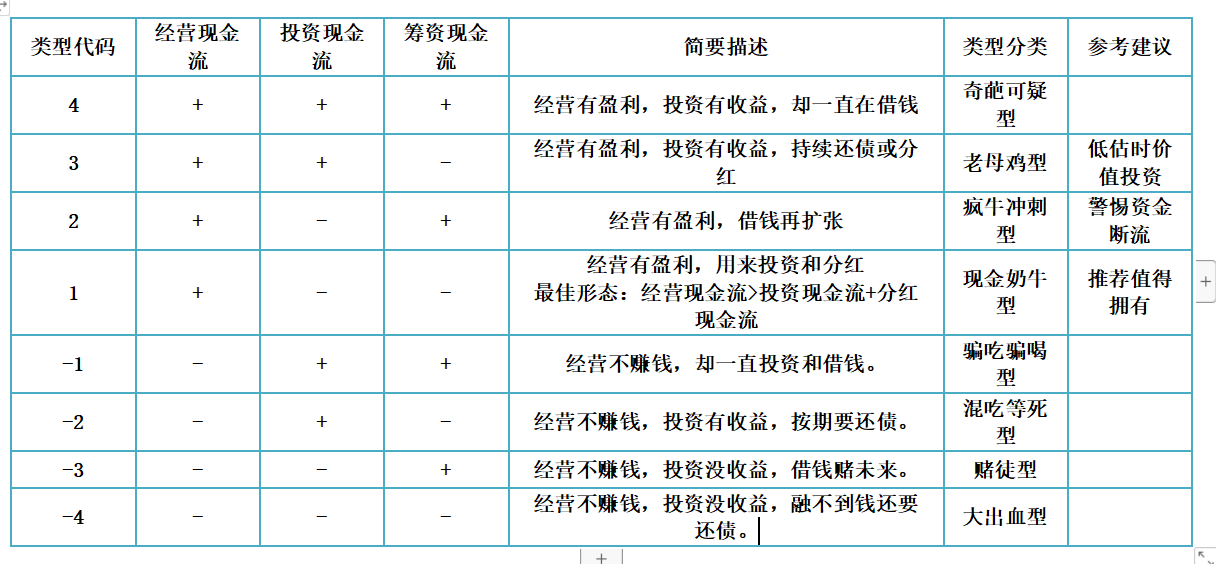

In [1]:
from IPython.display import Image
Image(filename="自由现金流分析.png")

## 同行业多股特征的输出与可视化

* 读入公司基本信息数据，并获得同行业公司列表

* 结合财务指标数据获取列表公司对应特征，并通过piovt生成透视表输出

In [33]:
stock_hy=pd.read_excel(r'G:\BaiduNetdiskDownload\上市公司基本信息列表\上市公司基本信息列表-20230217.xlsx')

In [37]:
stock_hy[stock_hy["股票代码"]=="000651.SZ"]["二级行业"]

238    白色家电
Name: 二级行业, dtype: object

In [41]:
cw_hy=pd.merge(cwzbsj,stock_hy[["股票代码",c]],on="股票代码")

In [39]:
stock_hy[stock_hy["二级行业"]=="白色家电"]["股票代码"]

76      000333.SZ
95      000418.SZ
127     000521.SZ
133     000527.SZ
238     000651.SZ
420     000893.SZ
443     000921.SZ
463     000951.SZ
711     002139.SZ
831     002260.SZ
1238    002668.SZ
1251    002681.SZ
1833    300247.SZ
1835    300249.SZ
3155    600336.SH
3457    600690.SH
3478    600711.SH
3620    600854.SH
3711    600983.SH
Name: 股票代码, dtype: object

In [42]:
cw_hy[cw_hy["二级行业"]=="白色家电"]

,index,股票代码,公告日期,基本每股收益,稀释每股收益,每股营业总收入,每股营业收入,每股资本公积,每股盈余公积,每股未分配利润,...,营业利润同比增长率(%)(单季度),营业利润环比增长率(%)(单季度),净利润同比增长率(%)(单季度),净利润环比增长率(%)(单季度),归属母公司股东的净利润同比增长率(%)(单季度),归属母公司股东的净利润环比增长率(%)(单季度),净资产同比增长率,研发费用,更新标识,二级行业
1365,46,000333.SZ,20180428,0.80,0.79,10.6755,10.5919,2.4393,0.5896,8.0321,...,22.6013,99.5537,20.4857,124.9509,20.7611,129.9803,20.8934,None,1,白色家电
1366,47,000333.SZ,20180831,1.97,1.94,21.6897,21.5219,2.6141,0.5858,7.9472,...,15.4136,41.3261,18.5318,44.0700,18.9183,46.1240,19.5853,None,1,白色家电
1367,48,000333.SZ,20181031,2.72,2.69,31.2138,30.9657,2.6656,0.5843,8.6729,...,24.3846,-32.1560,16.6303,-34.7107,18.5471,-35.3777,16.3540,6349429000.0,1,白色家电
1368,49,000333.SZ,20190420,3.08,3.05,39.2944,38.9710,2.7692,0.7623,8.8192,...,5.5514,-56.9573,2.0073,-51.7910,1.9701,-53.0454,12.6593,9810805000.0,1,白色家电
1369,50,000333.SZ,20190430,0.94,0.93,11.4335,11.3889,2.3370,0.7692,9.8272,...,13.7584,175.6451,15.8605,155.5006,16.6050,162.9874,13.1071,2205598000.0,1,白色家电
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64634,72,600983.SH,20211030,-0.30,-0.30,4.8381,4.8381,1.5960,0.3619,1.3795,...,-5880.0486,24.1951,-5003.9129,6.2720,-5003.9129,6.2720,-7.7310,93704172.8,1,白色家电
64635,73,600983.SH,20220422,-0.77,-0.77,6.4339,6.4339,1.5960,0.3619,0.9073,...,-1038.8689,-184.4807,-910.6995,-269.5341,-910.6995,-269.5341,-16.5970,113723450.62,1,白色家电
64636,74,600983.SH,20220422,-0.02,-0.02,1.5890,1.5890,1.5960,0.3619,0.8834,...,40.6615,91.4425,25.7083,94.9550,25.7083,94.9550,-16.5389,28792051.0,1,白色家电
64637,75,600983.SH,20220830,-0.01,-0.01,3.1913,3.1913,1.5960,0.3619,0.8926,...,129.1313,257.8558,106.6864,138.2656,106.6864,138.2656,-13.7817,58721157.72,1,白色家电


In [ ]:
cw_hy=pd.merge(cwzbsj,stock_hy[["股票代码","二级行业"]],on="股票代码")
cw_hy_pivot=cw_hy[cw_hy["二级行业"]==hy].pivot(index="报告期",values='流动资产/总资产', columns='股票代码')

* 输出各个公司的特征曲线图

* 通过checkbox实现选择不同特征，展现其对应图表，并通过上面的逻辑对所有checkbox归类

# 构建多页股票分析产品

## 首页

* 读入数据并构建会话状态存储所有数据

* 输出所有股票的简称与股票代码

* 以下代码来自app，都不能在这里运行

In [ ]:
#会话状态初始化方法
if 'cwzbsj' not in st.session_state:
    st.session_state.cwzbsj = read_cw()

In [ ]:
#注意做成索引的列不要丢掉
stock_daily.set_index("交易日期",inplace=True,drop=False)

## 个股分析页

* 基于上面的单股分析代码，构建单股分析页，
* 首先展示财务数据与行情数据的比较图
* 然后分别展示使用checkbox来选择财务与行情数据的展示图

In [ ]:
#通过text_input来输入股票简称
stock_name = st.sidebar.text_input('输入股票简称', '格力电器')

In [ ]:
#通过循环来布置checkbox按钮
st.sidebar.markdown("### 行情指标")
for i in stock_price_gl.columns:
    agree1 = st.sidebar.checkbox(i)
    if agree1:
        st.write(i)
        st_echarts(line_hq(i))

## 行业分析页

* 展示同行业多股的财务指标可视化线图，用checkbox来选择

* 最上方展示同行业多股的收盘价增长倍率的变化曲线

In [ ]:
#分类输出各个财务指标
st.sidebar.markdown("### 安全性指标")
an_quan=["流动比率","速动比率","资产负债率"]
for i in an_quan:
    agree1 = st.sidebar.checkbox(i)
    if agree1:
        cw_muti_index(i)

In [ ]:
#注意两边字段名称并不一致，需要对应一下
st.sidebar.markdown("### 盈利能力指标")
an_quan=["营业利润/营业总收入","销售毛利率","销售净利率","净资产收益率(扣除非经常损益)","总资产报酬率"]
st.sidebar.markdown("### 杜邦分析")
an_quan=["扣除非经常损益后的单季度净利润","总资产周转率","总资产净利率"]
st.sidebar.markdown("### 成长性指标分析")
an_quan=["营业总收入同比增长率(%)(单季度)","净利润同比增长率(%)(单季度)","扣除非经常性损益后的净利润(扣非净利润)",'每股营业收入','研发费用']
st.sidebar.markdown("### 管理水平指标")
an_quan=["应收账款周转率","存货周转率","固定资产周转率"]

In [ ]:
#获取多个股票的收盘价数据，调整数据框结构便于作图
price_list=st.session_state.stock_daily[st.session_state.stock_daily['股票简称'].isin(stock_list)].pivot(index="交易日期",columns="股票简称",values="收盘价").fillna(method='bfill').fillna(method='ffill')

In [ ]:
#计算股价增长倍率
(data[i]/data[i].iloc[0]).tolist()

## 自定义多股分析页

* 与行业分析页类似，但是多个股票通过自己输入来完成

In [ ]:
#输入股票，以空格分割，并读入
stock_input = st.text_input('请输入股票列表,空格分割', '格力电器 比亚迪')
stock_list=stock_input.split(" ")
cw_xx_hy=cw_xx[cw_xx["股票简称"].isin(stock_list)]